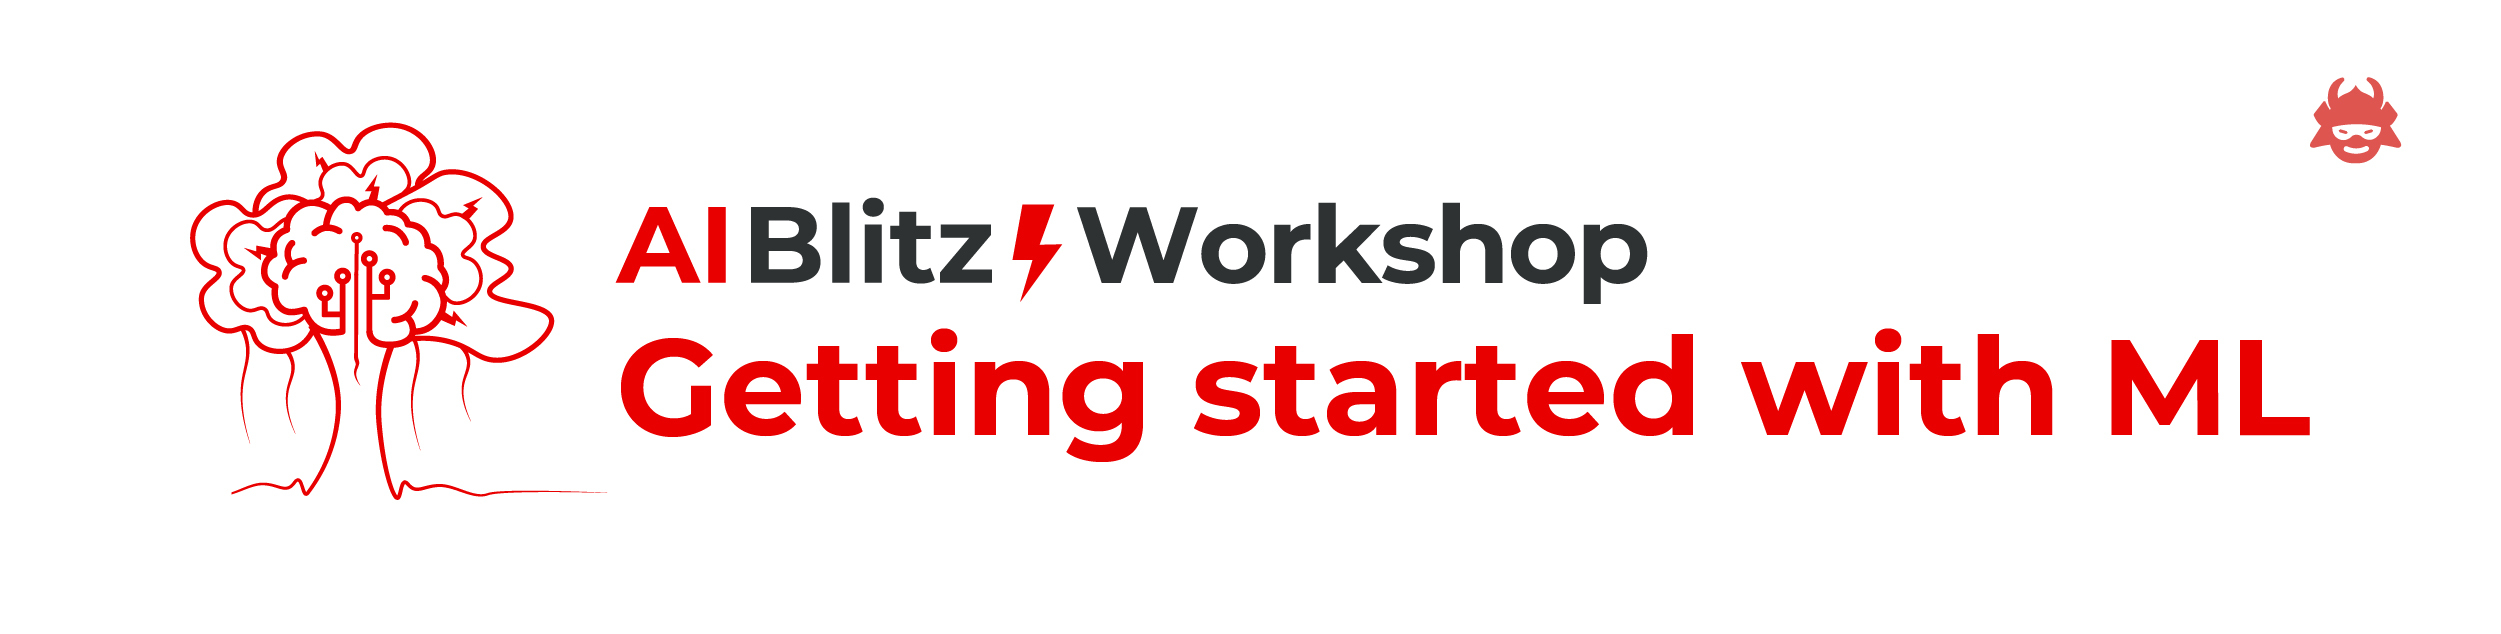

# So, what's Colab?

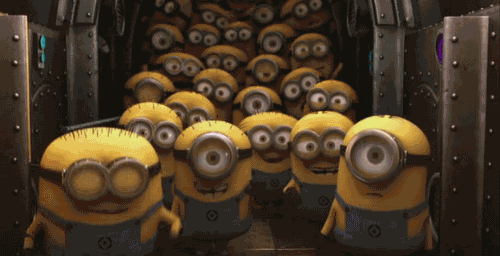

#### In order to simplify things here, Google Colaboratory is a platform used by professionals in the field of AI as well Data Enthusiasts.

Fine Vyom, but what is that weird Connect button upthere?

## What's a Cell?

In [2]:
print( "This is a cell!" )

This is a cell!


In [3]:
print( "Hey vyom, tone down that enthusiasm!!!".upper() )

HEY VYOM, TONE DOWN THAT ENTHUSIASM!!!


## Wait, you can compile code while typing?!

In [1]:
print("Pretty much.")

a, b = 99, 9

if b == 9 and (a + b == 108):
  print("Right?!")

Pretty much.
Right?!


# [WINEQ Practice Challenge](https://www.aicrowd.com/challenges/wineq) on AIcrowd

## Download Necessary Packages 📚

In [4]:
#!pip install --upgrade fastai 
!pip install -qq aicrowd-cli==0.1

     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 163kB 8.7MB/s 
     |████████████████████████████████| 204kB 45.4MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [8]:
API_KEY = '5e32948da8142f54ee4da04348c1b06a' #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [9]:
!aicrowd dataset download --challenge wineq

sample_submission.csv: 100% 1.97k/1.97k [00:00<00:00, 47.0kB/s]
test.csv: 100% 50.9k/50.9k [00:00<00:00, 502kB/s]
train.csv: 100% 212k/212k [00:00<00:00, 854kB/s]


In [10]:
!rm -rf data
!mkdir data

!mv train.csv data/train.csv
!mv test.csv data/test.csv
!mv sample_submission.csv data/sample_submission.csv

## SVMs! 🥊

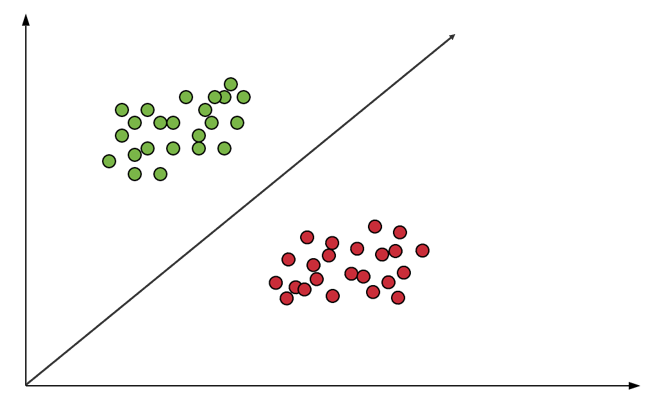

The main objective of a support vector machine is to segregate the given data in the best possible way. When the segregation is done, the distance between the nearest points is known as the margin. The approach is to select a hyperplane with the maximum possible margin between the support vectors in the given data-sets.

(https://medium.com/edureka/support-vector-machine-in-python-539dca55c26a)


## Import packages

In [11]:
# Libraries for looking at the Data
import pandas as pd
import numpy as np

# For Splitting the Data
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

# Importing the SVM!
from sklearn.svm import SVC

# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Importing the metrics
from sklearn.metrics import accuracy_score, f1_score

## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [12]:
# Path where data is stored
all_data_path = "data/train.csv" 

In [13]:
# Load data in dataframe using pandas
all_data = pd.read_csv(all_data_path)

## Visualize the data 👀

In [14]:
all_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,8.4,0.40,0.70,13.1,0.042,29.0,197.0,0.99800,3.06,0.64,9.7,5
2,7.8,0.17,0.23,1.7,0.029,39.0,128.0,0.99272,3.37,0.41,10.7,7
3,6.2,0.18,0.49,4.5,0.047,17.0,90.0,0.99190,3.27,0.37,11.6,6
4,6.5,0.26,0.24,10.8,0.042,47.0,130.0,0.99600,3.08,0.40,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3913,6.4,0.18,0.32,9.6,0.052,24.0,90.0,0.99630,3.35,0.49,9.4,6
3914,6.5,0.22,0.19,1.1,0.064,36.0,191.0,0.99297,3.05,0.50,9.5,6
3915,5.4,0.29,0.47,3.0,0.052,47.0,145.0,0.99300,3.29,0.75,10.0,6
3916,6.6,0.20,0.38,7.9,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7


We can see the dataset contains 12 columns,where columns 0-10 denotes different attributes of the wine the last column tells the quality of the wine from 1-10.

## Split Data into Train and Validation 🔪
-  The next step is to think of a way to test how well our model is performing. we cannot use the test data given as it does not contain the data labels for us to verify.    
- The workaround this is to split the given training data into training and validation. Typically validation sets give us an idea of how our model will perform on unforeseen data. it is like holding back a chunk of data while training our model and then using it to for the purpose of testing. it is a standard way to fine-tune hyperparameters in a model.    
- There are multiple ways to split a dataset into validation and training sets. following are two popular ways to go about it, [k-fold](https://machinelearningmastery.com/k-fold-cross-validation/), [leave one out](https://en.wikipedia.org/wiki/Cross-validation_statistics). 🧐
- Validation sets are also used to avoid your model from [overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) on the train dataset.

In [81]:
X_train, X_val= train_test_split(all_data, test_size=0.3, random_state=42) 

# You can play around with: test_size :)

# Always remember that the test_size can only be between 0 and 0.99! 🙋🏽‍♂️

- We have decided to split the data with 20 % as validation and 80 % as training.  
- To learn more about the train_test_split function [click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 🧐  
- This is of course the simplest way to validate your model by simply taking a random chunk of the train set and setting it aside solely for the purpose of testing our train model on unseen data. as mentioned in the previous block, you can experiment 🔬 with and choose more sophisticated techniques and make your model better.

- Now, since we have our data splitted into train and validation sets, we need to get the corresponding labels separated from the data.   
- with this step we are all set move to the next step with a prepared dataset.

In [82]:
# Time to make seperate Training Dataset!

X_train,y_train = X_train.iloc[:,:11], X_train.iloc[:,11]



# Time to make seperate Validation Dataset!

X_val,y_val = X_val.iloc[:,:11],X_val.iloc[:,11]

In [83]:
#Applying Standard scaling to get optimized result

sc = StandardScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train))
X_val = pd.DataFrame(sc.fit_transform(X_val))

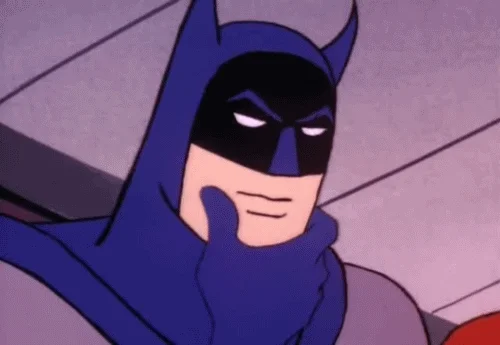

# TRAINING PHASE 🏋️

## Define the Model

- We have fixed our data and now we are ready to train our model.   

- There are a ton of classifiers to choose from some being [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc), [SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Random Forests](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Decision Trees](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052), etc.🧐         

- Remember that there are no hard-laid rules here. you can mix and match classifiers, it is advisable to read up on the numerous techniques and choose the best fit for your solution , experimentation is the key.     
   
- A good model does not depend solely on the classifier but also on the features you choose. So make sure to analyse and understand your data well and move forward with a clear view of the problem at hand.  you can gain important insight from [here](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2).🧐         

In [84]:
classifier = SVC(gamma='auto', max_iter=1000, kernel = 'poly', degree=5)


# Incase you want to go a step ahead, uncomment these two lines:
#from sklearn.linear_model import LogisticRegression
#2classifier = LogisticRegression()

### [What can I do to improve and experiment?](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769) 🤔

* You can change gamma to: 0.1, 1, 10, 100

* You can play around with max_iter: 1000 to infinity?

* You can change kernel to: ‘linear’, ‘rbf’, ‘poly’

* You can change degree to: 0, 1, 2, 3, 4, 5, 6

To read more about other sklearn classifiers visit [here 🧐](https://scikit-learn.org/stable/supervised_learning.html). Try and use other classifiers to see how the performance of your model changes. Try using [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) or [MLP](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and compare how the performance changes.

- To start you off, We have used a basic [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification) classifier here.    
- But you can tune parameters and increase the performance. To see the list of parameters visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).   
- Do keep in mind there exist sophisticated techniques for everything, the key as quoted earlier is to search them and experiment to fit your implementation.

## Train the classifier

In [85]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Got a warning! Dont worry, its just beacuse the number of iteration is very less(defined in the classifier in the above cell).Increase the number of iterations and see if the warning vanishes and also see how the performance changes.Do remember increasing iterations also increases the running time.( Hint: max_iter=500)

# Validation Phase 🤔
Wonder how well your model learned! Lets check it.

## Predict on Validation

Now we predict using our trained model on the validation set we created and evaluate our model on unforeseen data.

In [86]:
y_pred = classifier.predict(X_val)

## Evaluate the Performance

- We have used basic metrics to quantify the performance of our model.  
- This is a crucial step, you should reason out the metrics and take hints to improve aspects of your model.
- Do read up on the meaning and use of different metrics. there exist more metrics and measures, you should learn to use them correctly with respect to the solution,dataset and other factors. 
- [F1 score](https://en.wikipedia.org/wiki/F1_score) is the metric for this challenge

In [87]:
accuracy = accuracy_score(y_val,y_pred)
f1 = f1_score(y_val,y_pred,average='macro')

print("F1 score of the model is :" ,f1)
print("Accuracy of the model is :" ,accuracy)

F1 score of the model is : 0.20589928901841045
Accuracy of the model is : 0.4804421768707483


# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.

## Load Test Set
Load the test data now

In [88]:
final_test_path = "data/test.csv"
final_test = pd.read_csv(final_test_path)

## Predict Test Set
Time for the moment of truth! Predict on test set and time to make the submission.

In [89]:
submission = classifier.predict(final_test)

## Save the prediction to csv

🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

In [90]:
submission = pd.DataFrame(submission) 
submission.to_csv('submission.csv',header=['quality'],index=False)

## Making Direct Submission thought Aicrowd CLI

In [91]:
!aicrowd submission create -c wineq -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 3.6/2.0 KB • ? • 0:00:00
                                  ╭─────────────────────────╮                                  
                                  │ Successfully submitted! │                                  
                                  ╰─────────────────────────╯                                  
                                        Important links                                        
┌──────────────────┬──────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/wineq/submissions/127404              │
│                  │                                                                          │
│  All submissions │ https://www.aicrowd.com/challenges/wineq/submissions?my_submissions=true │
│                  │                                                                          │
│      Leaderboard │ https://www.aicrowd.com/challenges

### Tip for Starting into Python 🐍 



*   Code everyday.
*   Do dumb sh*t with Python.
*   StackOverflow is the best Python tutorial.
*   It's never too late.


